# Complexity analysis

This notebook is thought to solve the question: how does the code complexity increase if $N$ points is increasing?

We first simulated the same problem (truncated sphere mass density distribution) changing every time the number of masses we were accounting for in the n-body problem. Then evaluated the time it requires to complete the simulation. We used the code developed in the "$\texttt{complexity.zsh}$" file, which is a shell script that does what's explained abouve in few passages. 

Here we manually report the output time $t$ we obtained from running the code several times in an array, and check its dependency on $N$. 

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
# use the script: complexity.zsh.

# Terminal command to run this script:
# zsh complexity.zsh

In [3]:
# define the times array from running the code: 

times = np.array([0.04,0.78,0.31,0.77,1.11,4.75,3.07,6.09,6.24, 12.82])

Define the range of masses used: 

In [4]:
Narray = np.arange(10,110,10)

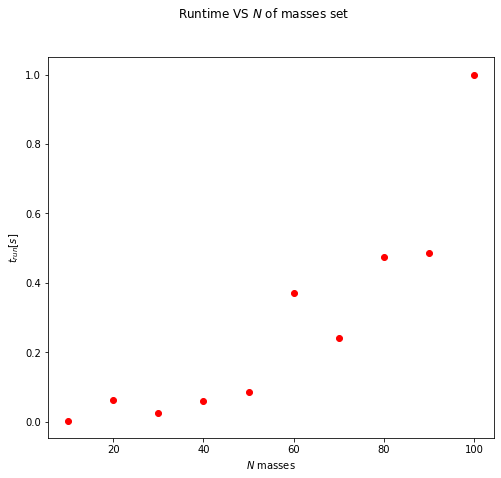

In [5]:
plt.figure(figsize = (8,7))

plt.scatter(Narray, times/times.max(), c = 'r')
plt.xlabel("$N$ masses")
plt.ylabel("$t_{run} [s]$")
plt.suptitle("Runtime VS $N$ of masses set")
plt.show()

Let's do a simple fit to see how the dependency goes: 

In [6]:
def fit_func(N, alpha, k): 
    
    return k * (N/100)**alpha

In [7]:
import scipy

params, _ = scipy.optimize.curve_fit(fit_func, Narray, times/times.max())

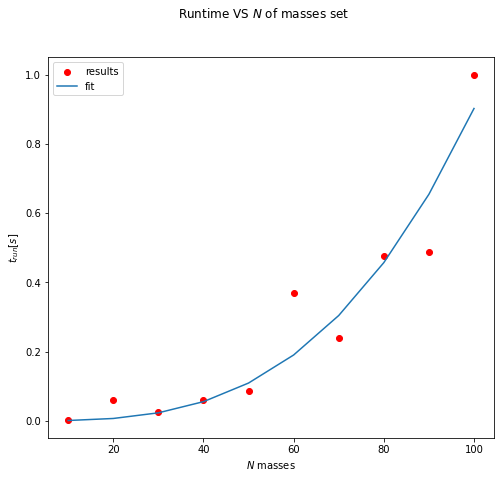

In [8]:
plt.figure(figsize = (8,7))

plt.scatter(Narray, times/times.max(), c = 'r', label="results")
plt.plot(Narray, fit_func(Narray, params[0], params[1]), label="fit")
plt.xlabel("$N$ masses")
plt.ylabel("$t_{run} [s]$")
plt.suptitle("Runtime VS $N$ of masses set")
plt.legend()
plt.show()

In [9]:
print("alpha:", params[0], "k:", params[1])

alpha: 3.048816386297051 k: 0.9020328556685886


We see that the dependency goes as a power of three. Is this correct? Yes, because in order to do the evaluations the code has to determine for each mass (N times) a value for the positions and velocities (N times $\cdot$ N times). The total would return a $O(N^{3})$.